In [1]:
from dpks.quant_matrix import QuantMatrix

import pandas as pd
import numpy as np

/home/aaron/miniconda3/envs/dpkstest0.1.5/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[WARNING] /home/aaron/miniconda3/envs/dpkstest0.1.5/lib/python3.11/site-packages/numba/core/decorators.py:250: RuntimeWarning: nopython is set for njit and is ignored
  warnings.warn('nopython is set for njit and is ignored', RuntimeWarning)



In [2]:
qm = QuantMatrix(
    quantification_file="../tests/input_files/data_sepsis.tsv",
    design_matrix_file="../tests/input_files/design_sepsis.tsv"
).filter()

In [3]:
quantified_data = (
    qm.normalize(
        method="mean",
        use_rt_sliding_window_filter=True,
        rt_unit="second",
        stride=5,
        minimum_data_points=200,
    )
    .quantify(
        method="maxlfq",
        threads=4,
        #top_n=5
    )
    .impute(
        method="uniform_percentile",
        percentile=0.05
    )
    .compare(
        method="linregress",
        min_samples_per_group=2,
        comparisons=[(2, 1)]
    )
)

[WARNING] /home/aaron/miniconda3/envs/dpkstest0.1.5/lib/python3.11/site-packages/numba/np/ufunc/parallel.py:371: NumbaWarning: The TBB threading layer requires TBB version 2021 update 6 or later i.e., TBB_INTERFACE_VERSION >= 12060. Found TBB_INTERFACE_VERSION = 12050. The TBB threading layer is disabled.
  warnings.warn(problem)

[WARNING] /home/aaron/miniconda3/envs/dpkstest0.1.5/lib/python3.11/site-packages/dpks/quantification.py:275: NumbaTypeSafetyWarning: unsafe cast from uint64 to int64. Precision may be lost.
  grouping = mask_group(groupings[group_idx])



In [4]:
import xgboost

clf = xgboost.XGBClassifier(
    max_depth=2,
    #subsample=0.5,
    reg_lambda=2,
    objective="binary:logistic",
    seed=42
)

In [5]:
quantified_data = quantified_data.explain(
    clf,
    comparisons=[(2, 1)],
    n_iterations=10,
    downsample_background=True
)

In [6]:
quantified_data = quantified_data.annotate()

In [7]:
import seaborn as sns

In [8]:
import gseapy as gp

In [9]:
names = gp.get_library_name()

In [10]:
for name in names:

    print(name)

ARCHS4_Cell-lines
ARCHS4_IDG_Coexp
ARCHS4_Kinases_Coexp
ARCHS4_TFs_Coexp
ARCHS4_Tissues
Achilles_fitness_decrease
Achilles_fitness_increase
Aging_Perturbations_from_GEO_down
Aging_Perturbations_from_GEO_up
Allen_Brain_Atlas_10x_scRNA_2021
Allen_Brain_Atlas_down
Allen_Brain_Atlas_up
Azimuth_2023
Azimuth_Cell_Types_2021
BioCarta_2013
BioCarta_2015
BioCarta_2016
BioPlanet_2019
BioPlex_2017
CCLE_Proteomics_2020
CORUM
COVID-19_Related_Gene_Sets
COVID-19_Related_Gene_Sets_2021
Cancer_Cell_Line_Encyclopedia
CellMarker_2024
CellMarker_Augmented_2021
ChEA_2013
ChEA_2015
ChEA_2016
ChEA_2022
Chromosome_Location
Chromosome_Location_hg19
ClinVar_2019
DSigDB
Data_Acquisition_Method_Most_Popular_Genes
DepMap_WG_CRISPR_Screens_Broad_CellLines_2019
DepMap_WG_CRISPR_Screens_Sanger_CellLines_2019
Descartes_Cell_Types_and_Tissue_2021
Diabetes_Perturbations_GEO_2022
DisGeNET
Disease_Perturbations_from_GEO_down
Disease_Perturbations_from_GEO_up
Disease_Signatures_from_GEO_down_2014
Disease_Signatures_from_G

In [11]:
enr = quantified_data.enrich(
    method="enrichr_overreptest",
    filter_pvalue=True,
    pvalue_column="CorrectedPValue2-1",
    pvalue_cutoff=0.1
)

[WARNING] /home/aaron/miniconda3/envs/dpkstest0.1.5/lib/python3.11/site-packages/gseapy/plot.py:689: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(

[WARNING] /home/aaron/miniconda3/envs/dpkstest0.1.5/lib/python3.11/site-packages/gseapy/plot.py:689: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[self.colname].replace(



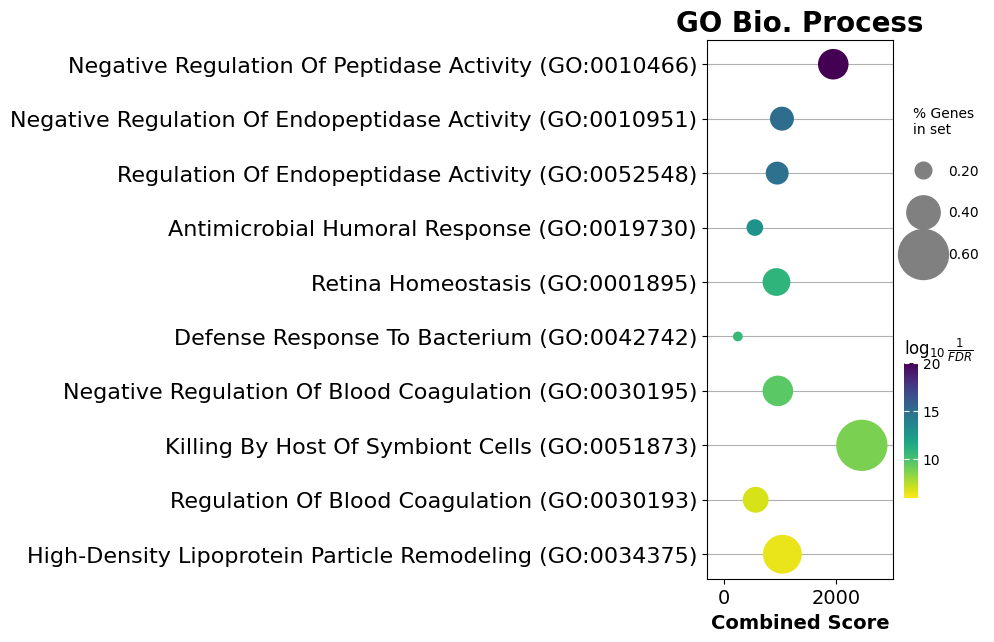

In [12]:
# simple plotting function
from gseapy import barplot, dotplot

ax = dotplot(enr.res2d, title='GO Bio. Process',cmap='viridis_r', size=10, figsize=(3,7))

In [13]:
enr = quantified_data.enrich(
    method="enrichr_overreptest",
    filter_shap=True,
    shap_column="MeanSHAP2-1",
    shap_cutoff=0.0
)

In [14]:
enr.results.head(10)

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,GO_Biological_Process_2023,High-Density Lipoprotein Particle Remodeling (...,6/15,9.287042e-10,0.000001,0,0,88.751678,1845.789127,APOM;APOC1;APOA2;APOA1;APOA4;PLTP
1,GO_Biological_Process_2023,Cholesterol Transport (GO:0030301),8/51,5.209733e-09,0.000003,0,0,25.061857,477.998219,APOM;NPC2;APOC1;APOA2;APOA1;APOA4;APOB;CLU
2,GO_Biological_Process_2023,Positive Regulation Of Endocytosis (GO:0045807),9/79,1.034690e-08,0.000004,0,0,17.414384,320.190938,C3;VTN;LRP1;LMAN2;APOA2;APOA1;CALR;CLU;B2M
3,GO_Biological_Process_2023,Cholesterol Efflux (GO:0033344),6/23,1.779720e-08,0.000005,0,0,46.967233,838.093861,APOM;NPC2;APOC1;APOA2;APOA1;APOA4
4,GO_Biological_Process_2023,Negative Regulation Of Peptidase Activity (GO:...,8/60,1.973654e-08,0.000005,0,0,20.714809,367.497165,CST3;VTN;LRP1;SERPINF1;SERPINA10;SERPING1;TIMP...
5,GO_Biological_Process_2023,Regulation Of Macrophage Derived Foam Cell Dif...,6/30,1.001030e-07,0.000018,0,0,33.256711,536.000628,ITGB3;ADIPOQ;PLA2G2A;LCP1;APOB;PF4
6,GO_Biological_Process_2023,Reverse Cholesterol Transport (GO:0043691),5/16,1.068371e-07,0.000018,0,0,60.103030,964.771482,APOM;APOA2;APOA1;APOA4;CLU
7,GO_Biological_Process_2023,Defense Response To Bacterium (GO:0042742),11/204,5.704703e-07,0.000084,0,0,7.778210,111.825800,CHGA;IGHM;PGLYRP2;PLA2G2A;LCN2;DEFA1;LYZ;S100A...
8,GO_Biological_Process_2023,Regulation Of Cholesterol Transport (GO:0032374),5/23,7.877641e-07,0.000103,0,0,36.716667,516.018498,LRP1;APOC1;APOA2;APOA1;APOA4
9,GO_Biological_Process_2023,Phospholipid Efflux (GO:0033700),4/11,1.097647e-06,0.000129,0,0,75.072848,1030.175266,APOC1;APOA2;APOA1;APOA4


[WARNING] /home/aaron/miniconda3/envs/dpkstest0.1.5/lib/python3.11/site-packages/gseapy/plot.py:689: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(

[WARNING] /home/aaron/miniconda3/envs/dpkstest0.1.5/lib/python3.11/site-packages/gseapy/plot.py:689: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[self.colname].replace(



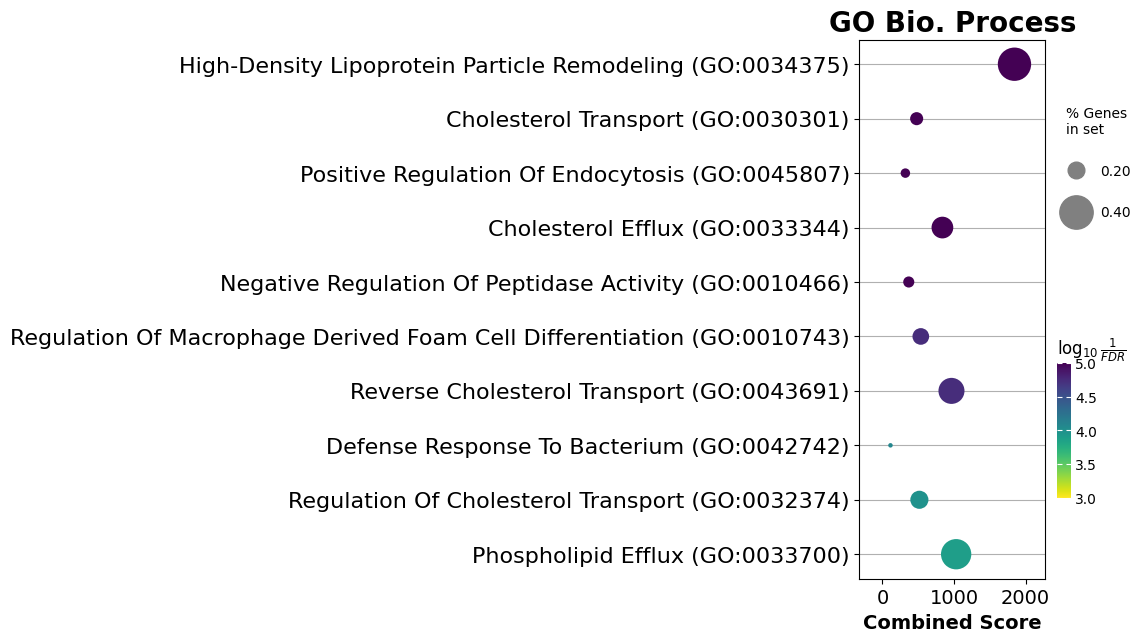

In [15]:
# simple plotting function
from gseapy import barplot, dotplot

ax = dotplot(enr.res2d, title='GO Bio. Process',cmap='viridis_r', size=10, figsize=(3,7))

In [16]:

background_genes = quantified_data.row_annotations['Gene'].to_list()

In [17]:
enr = quantified_data.enrich(
    method="enrichr_overreptest",
    libraries=['GO_Biological_Process_2023', 'KEGG_2021_Human', 'Reactome_2022'],
    organism="human",
    #background=background_genes,
    filter_pvalue=True,
    subset_library=True
)

[INFO] Downloading and generating Enrichr library gene sets...
[INFO] Library is already downloaded in: /home/aaron/.cache/gseapy/Enrichr.GO_Biological_Process_2023.gmt, use local file
[INFO] 0001 gene_sets have been filtered out when max_size=2000 and min_size=0
[INFO] Downloading and generating Enrichr library gene sets...
[INFO] Library is already downloaded in: /home/aaron/.cache/gseapy/Enrichr.KEGG_2021_Human.gmt, use local file
[INFO] Downloading and generating Enrichr library gene sets...
[INFO] Library is already downloaded in: /home/aaron/.cache/gseapy/Enrichr.Reactome_2022.gmt, use local file
[INFO] 0002 gene_sets have been filtered out when max_size=2000 and min_size=0


In [18]:
enr = quantified_data.enrich(
    method="overreptest",
    libraries=['GO_Biological_Process_2023'],
    organism="human",
    #background=background_genes,
    filter_shap=True,
    subset_library=True
)

[INFO] Downloading and generating Enrichr library gene sets...
[INFO] Library is already downloaded in: /home/aaron/.cache/gseapy/Enrichr.GO_Biological_Process_2023.gmt, use local file
[INFO] 0001 gene_sets have been filtered out when max_size=2000 and min_size=0


In [19]:
from gseapy import enrichment_map
# return two dataframe
nodes, edges = enrichment_map(enr.res2d, top_term=10)



[WARNING] /home/aaron/miniconda3/envs/dpkstest0.1.5/lib/python3.11/site-packages/gseapy/plot.py:689: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(

[WARNING] /home/aaron/miniconda3/envs/dpkstest0.1.5/lib/python3.11/site-packages/gseapy/plot.py:689: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[self.colname].replace(



In [20]:
import networkx as nx

In [21]:
# build graph
G = nx.from_pandas_edgelist(edges,
                            source='src_idx',
                            target='targ_idx',
                            edge_attr=['jaccard_coef', 'overlap_coef', 'overlap_genes'])



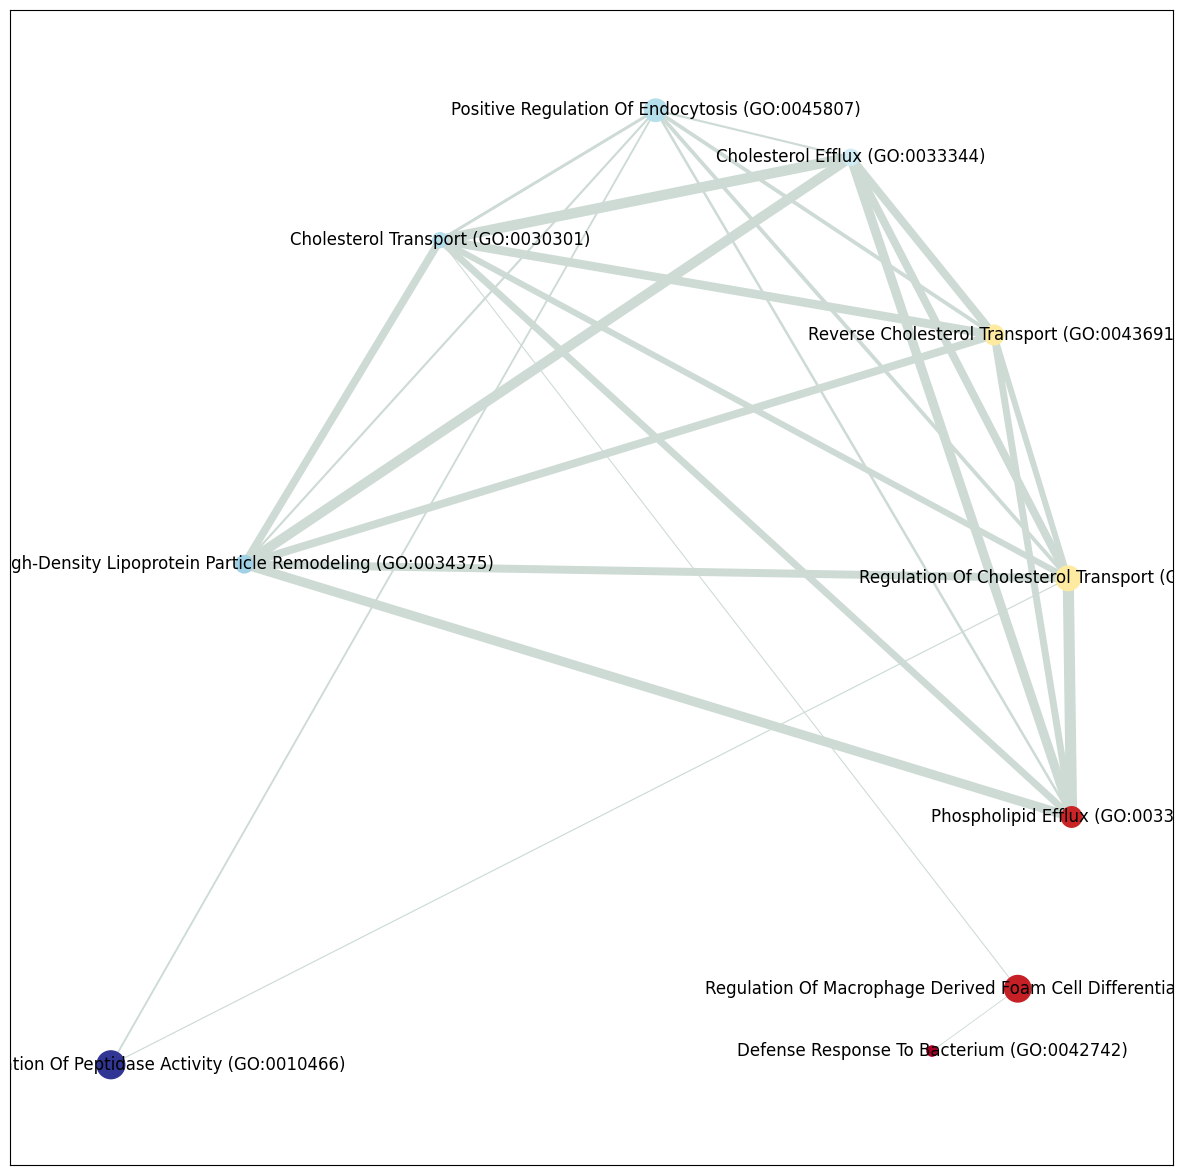

In [22]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15, 15))

# init node cooridnates
pos=nx.layout.spiral_layout(G)
#node_size = nx.get_node_attributes()
# draw node
nx.draw_networkx_nodes(G,
                       pos=pos,
                       cmap=plt.cm.RdYlBu,
                       node_color=list(nodes.p_inv),
                       node_size=list(nodes.Hits_ratio *1000))
# draw node label
nx.draw_networkx_labels(G,
                        pos=pos,
                        labels=nodes.Term.to_dict())
# draw edge
edge_weight = nx.get_edge_attributes(G, 'jaccard_coef').values()
nx.draw_networkx_edges(G,
                       pos=pos,
                       width=list(map(lambda x: x*10, edge_weight)),
                       edge_color='#CDDBD4')
plt.show()



In [23]:
cyto = nx.cytoscape_data(G)